<a href="https://colab.research.google.com/github/annsara95/Machine_Learning_Personal_Projects/blob/master/GOOGL_BUY_SELL_HOLD_Trading_Strategy_using_MACD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:**

*   Understanding MACD on GOOGL stock price
*   Implementing BUY-SELL trading strategy based on MACD



**Import Data from Google Drive:**

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final_Df.csv')
df.set_index('Date', inplace= True)

In [4]:
df.head()

,Mkt-RF,SMB,HML,RF,Open,Close,High,Low,Volume,average_OC,average_all,O-C,H-L,Return,ADS_Index,FB,AAPL,NFLX,GOOGL
Date,,,,,,,,,,,,,,,,,,,
2016-01-04,0.10,-0.24,-0.28,0.009,762.200012,759.440002,762.200012,747.539978,3369100,760.820007,757.845001,2.760010,14.660034,0.002752,-0.323161,102.084999,103.980000,109.480,760.820007
2016-01-05,0.45,-0.32,-0.08,0.009,764.099976,761.530029,769.200012,755.650024,2260800,762.815002,762.620010,2.569947,13.549988,-0.002889,-0.308306,102.810001,104.230000,109.055,762.815002
2016-01-06,0.17,0.27,-0.35,0.009,750.369995,759.330017,765.729980,748.000000,2410300,754.850006,755.857498,-8.960022,17.729980,-0.024140,-0.294275,102.049999,100.629998,111.485,754.850006
2016-01-07,0.09,-0.59,0.03,0.009,746.489990,741.000000,755.309998,735.280029,3156600,743.744995,744.520004,5.489990,20.029969,-0.013617,-0.281066,99.209999,97.564999,115.460,743.744995
2016-01-08,0.21,-0.36,0.15,0.009,747.799988,730.909973,750.119995,728.919983,2375300,739.354981,739.437485,16.890015,21.200012,0.002955,-0.268678,98.605000,97.755001,113.860,739.354981


**Understanding GOOGL stock price:**

In [5]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df['Open'], name="GOOGL Open",
                         line_color='deepskyblue'))

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], name="GOOGL Close",
                         line_color='dimgray'))

fig.update_layout(title_text='Time Series',
                  xaxis_rangeslider_visible=True)
fig.show()

**Moving Average Convergence Divergence (MACD):**

**MACD** is a trend-following momentum indicator that shows the relationship between two moving averages (Exponential Moving Average) of a stock's price. 

**MACD formula:**
**MACD = 12 Day period EMA - 26 Day period EMA**


*   The MACD has a positive value whenever the 12-period EMA is above the 26-period EMA

*   The MACD has a negative value whenever the 12-period EMA is below the 26-period EMA


A 9-day EMA of MACD called "**signal line**" is plotted on top of the MACD line.


**Calculating  the Exponential Moving Average (EMA):**

In [0]:
EMA = pd.DataFrame(index=df.index)
EMA = df[['Close']][0:].copy()  #copy Close price from df to EMA df
EMA['EMA12'] = EMA['Close'].ewm(12).mean() #12 period moving average
EMA['EMA26'] = EMA['Close'].ewm(26).mean() #26 period moving average

In [0]:
#separate negative and possitve EMA signal
for i, row in EMA.iterrows():
    if EMA.loc[i,'EMA12'] < EMA.loc[i,'EMA26']:
        EMA.loc[i,'NEGATIVE'] = EMA.loc[i,'EMA12']
    elif EMA.loc[i,'EMA12'] > EMA.loc[i,'EMA26']: 
        EMA.loc[i,'POSITIVE'] = EMA.loc[i,'EMA12']
        
for i, row in EMA.iterrows():
    if (abs(EMA.loc[i,'EMA26']-EMA.loc[i,'EMA12']))<0.005*(EMA['EMA12'].max()-EMA['EMA12'].min()): # Cross over signal when the difference of EMA less than 0.5% of EMA12 range
        EMA.loc[i,'CROSSOVER']= EMA.loc[i,'EMA26'] 

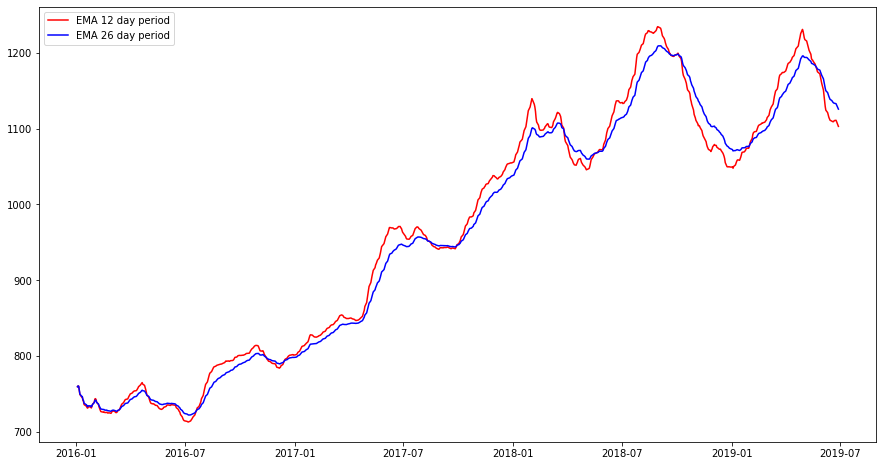

In [8]:
import datetime as dt
x = [dt.datetime.strptime(date,'%Y-%m-%d').date() for date in EMA.index]

plt.figure(figsize=(15,8))
plt.plot(x, EMA['EMA12'], label='EMA 12 day period', color = 'red')
plt.plot(x, EMA['EMA26'].values, label='EMA 26 day period', color='blue')
plt.legend(loc='upper left')
plt.show()

**Understanding the EMAs Crossover:**

The two EMAs have different speed or periods. The faster one (26 Day EMA) will react more quickly to price movements than the slower one (12 Day EMA).When a new trend occurs, the fast line will react first and eventually cross the slower line. When this “crossover” occurs, and the fast line starts to “diverge” or move away from the slower line, it often indicates that a new trend has formed.

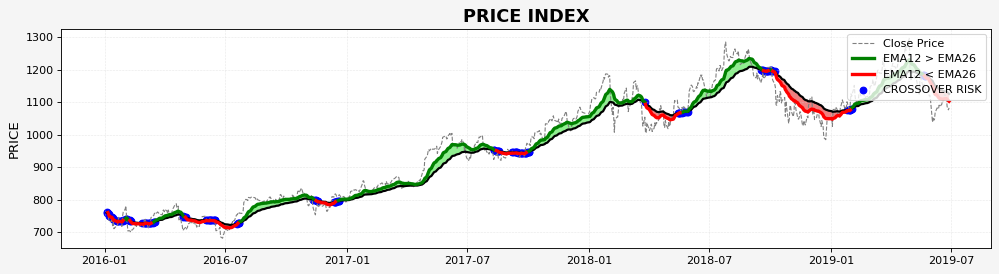

In [9]:
import datetime as dt

fig = plt.figure(figsize=(15,8),dpi=80,facecolor='whitesmoke') # fig size = 20x10 inches/ 100 dots per inch
x = [dt.datetime.strptime(date,'%Y-%m-%d').date() for date in EMA.index] #convert x axis into datetime format

ax1 = fig.add_subplot(211)
ax1.set_title('PRICE INDEX',fontsize=16,weight='bold')

Close = EMA['Close'] 
EMA12 = EMA['EMA12']
EMA26 = EMA['EMA26']
POSSITIVE = EMA['POSITIVE']
NEGATIVE = EMA['NEGATIVE']

#plotting EMA, POSITIVE, NEGATIVE and CLOSE price
ax1.plot(x, Close,color="gray", linewidth=1.0, linestyle="--",label='Close Price') #plot Close Price against x axis
ax1.plot(x, EMA26,color="black", linewidth=2.0, linestyle="-") #plot EMA26 against x axis
ax1.plot(x, POSSITIVE,color="green", linewidth=3.0, linestyle="-",label='EMA12 > EMA26') #plot possitive EMA12 against x axis
ax1.plot(x, NEGATIVE,color="red", linewidth=3.0, linestyle="-",label='EMA12 < EMA26') #plot negative EMA12 against x axis

#plotting crossover
ax1.scatter(x, EMA['CROSSOVER'],color='blue',label='CROSSOVER RISK') # mark CROSSOVER RISK points
ax1.fill_between(x, EMA26, EMA12, where=EMA12>EMA26, facecolor='lightgreen') #highlight buy signal
ax1.fill_between(x, EMA26, EMA12, where=EMA12<EMA26, facecolor='lightcoral') #highlight sell signal

#plot settings
ax1.grid(color='lightgray', linestyle=':', linewidth=0.5)#set grid
ax1.set_ylim = (20000.0, 25000.0) # Set limits on y axis
ax1.set_ylabel('PRICE',fontsize=12) #set y-axis lebel
ax1.legend(loc='upper right') #set legand

**Understanding the Crossover for Trading Strategy:**

Crossover happens when MACD crosses above or below the signal line.
These crossovers can function as a trigger for buy and sell signals.

*   BUY: MACD crosses above its signal line
*   SELL: MACD crosses below the signal line
*   HOLD: Any other time

In [0]:
MACD = pd.DataFrame(index=df.index) #create new dataframe for MACD
MACD = df[['Close']][0:].copy() #copy Close price from df to MACD
MACD['MACD']=EMA['EMA12']-EMA['EMA26'] #calculate MACD = 12 Day period - 26 Day period
MACD['SIGNAL']= MACD['MACD'].ewm(9).mean() #calculate signal - 9 Day period EMA of MACD
MACD['HIST']=MACD['MACD']-MACD['SIGNAL'] #calculate histogram

for i, row in MACD.iterrows():
    if MACD.loc[i,'HIST']>0:
        MACD.loc[i,'POSITIVE']=MACD.loc[i,'HIST']
    else:
        MACD.loc[i,'NEGATIVE']=MACD.loc[i,'HIST']

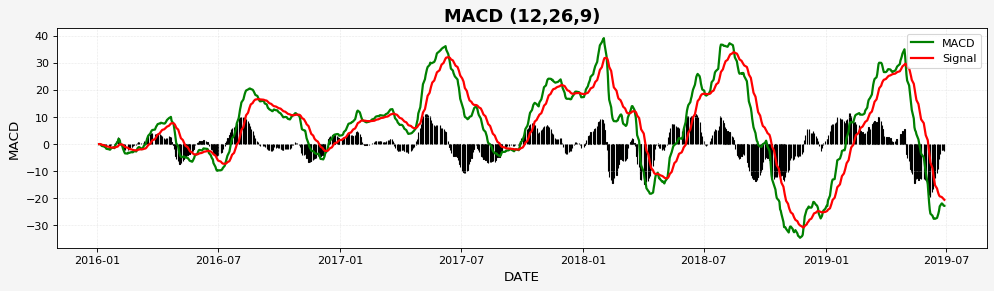

In [11]:
import datetime as dt

fig = plt.figure(figsize=(15,8),dpi=80,facecolor='whitesmoke')
x = [dt.datetime.strptime(date,'%Y-%m-%d').date() for date in EMA.index] #convert x axis into datetime format

ax1 = fig.add_subplot(212)
ax1.set_title('MACD (12,26,9)',fontsize=16,weight='bold')
ax1.bar(x, MACD['POSITIVE'],width=200/len(EMA), color="lightgreen",align='center',edgecolor='black')#plus histogram 
ax1.bar(x, MACD['NEGATIVE'],width=200/len(EMA), color="lightcoral",edgecolor='black')#minus histogram
ax1.plot(x, MACD['MACD'],color="green", linewidth=2.0, linestyle="-",label='MACD') #plot MACD
ax1.plot(x, MACD['SIGNAL'],color="red", linewidth=2.0, linestyle="-",label='Signal') #plot signal

#settings for plot
ax1.grid(color='lightgray', linestyle=':', linewidth=0.5)#set grid
ax1.set_ylabel('MACD',fontsize=12) #set y-axis lebel
ax1.set_xlabel('DATE',fontsize=12) #set x-axis lebel
ax1.legend(loc='upper right') #set legand

**Create Trading Strategy of BUY and SELL based on MACD-Signal Crossovers:**


In [0]:
signal = MACD['SIGNAL']
macd = MACD['MACD']
LongShort = list();
for i in range(len(signal)):
    # If the MACD crosses the signal line upward
    if macd[i] > signal[i] and macd[i - 1] <= signal[i - 1]:
        LongShort.append("BUY")
    # 
    elif macd[i] < signal[i] and macd[i - 1] >= signal[i - 1]:
        LongShort.append("SELL")
    #                          # Do nothing if not crossed
    else:
        LongShort.append("HOLD")
MACD['Trading_Strategy'] = LongShort

In [0]:
# Select buying and selling signals: where moving averages cross
buys = MACD.ix[(MACD['Trading_Strategy'] == 'BUY')]
sells = MACD.ix[(MACD['Trading_Strategy'] == 'SELL')]

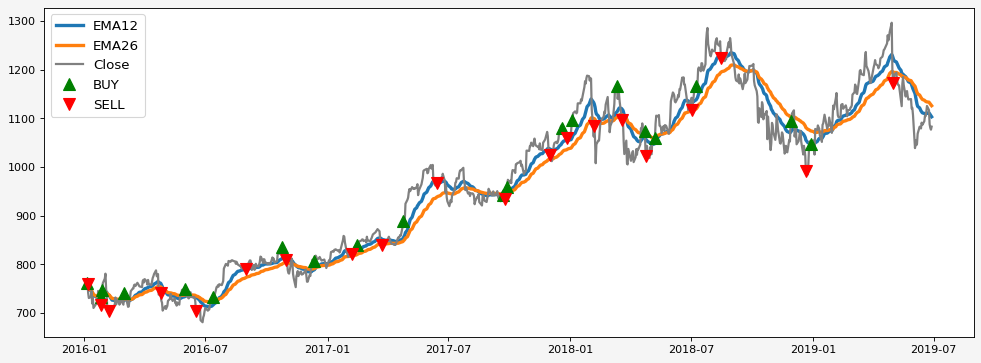

In [14]:
import datetime as dt

fig = plt.figure(figsize=(15,12),dpi=80,facecolor='whitesmoke') 

#create x-axis 
x = [dt.datetime.strptime(date,'%Y-%m-%d').date() for date in EMA.index]
x_buys = [dt.datetime.strptime(date,'%Y-%m-%d').date() for date in buys.index]
x_sells = [dt.datetime.strptime(date,'%Y-%m-%d').date() for date in sells.index]

#subplot
ax = fig.add_subplot(212)

#plot graphs
ax.plot(x, EMA['EMA12'], lw=3, label='EMA12')
ax.plot(x, EMA['EMA26'], lw=3, label='EMA26')
ax.plot(x, MACD['Close'], '-',lw=2, label='Close', color='grey')

#plot buy and sell tickers
ax.plot(x_buys, EMA.ix[buys.index]['Close'], '^', markersize=10, color='g', label='BUY')
ax.plot(x_sells, EMA.ix[sells.index]['Close'], 'v', markersize=10, color='r', label='SELL')
ax.legend(loc='upper left', fontsize=12)
plt.show()

**The above graph shows us when to BUY and SELL trading strategy for GOOGL stock  using MACD**